Test evaluation complete.
test_result  test_failure
False        1               30
Name: count, dtype: int64


C:\Users\s\AppData\Local\Temp\ipykernel_28308\3424362698.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_failure', y=metric, data=df, palette='Set2')
C:\Users\s\AppData\Local\Temp\ipykernel_28308\3424362698.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_failure', y=metric, data=df, palette='Set2')
C:\Users\s\AppData\Local\Temp\ipykernel_28308\3424362698.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_failure', y=metric, data=df, palette='Set2')
C:\Users\s\AppData\Local\Temp\ipykernel_28308\342436269

ValueError: Could not interpret value `calibrated_mean_entropy` for `y`. An entry with this name does not appear in `data`.

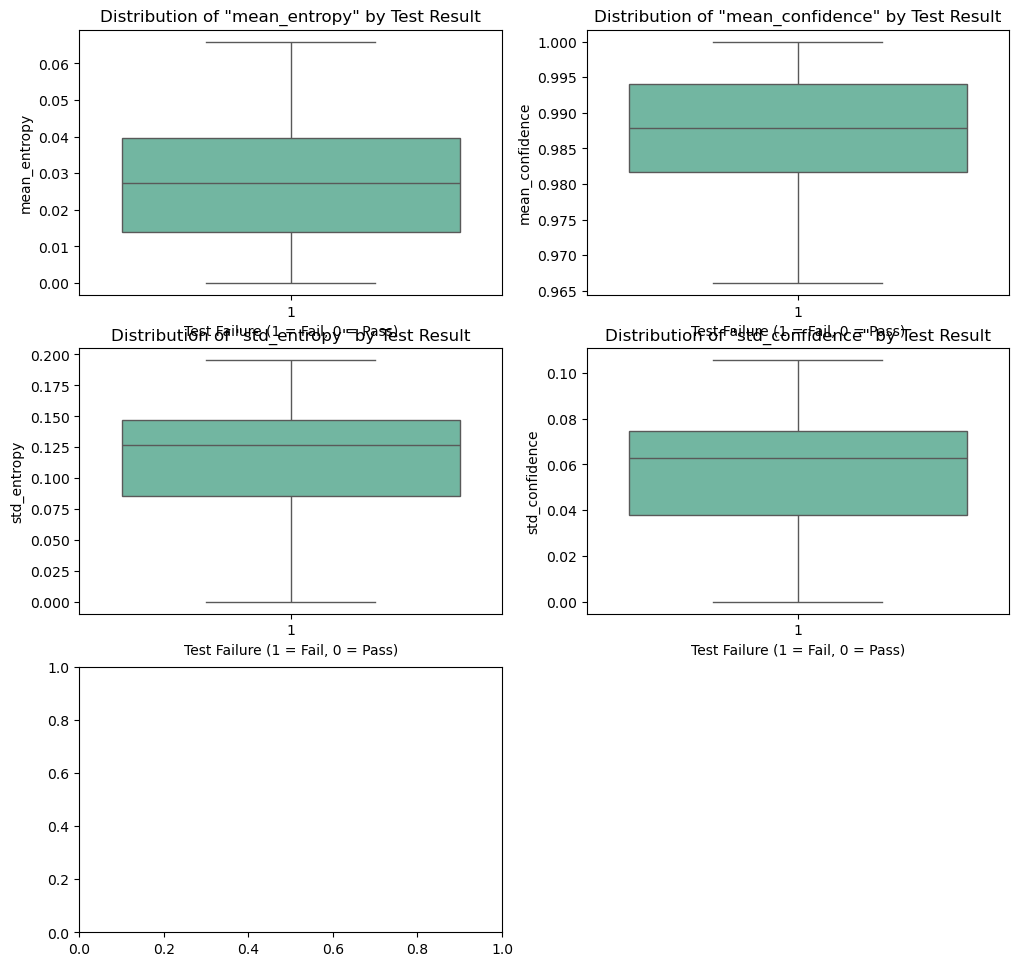

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import io
import sys
from contextlib import redirect_stdout, redirect_stderr
from io import StringIO




df = pd.read_csv('C:\\Users\\s\\Desktop\\Dev\\SamsungProject\\dataChekpoints\\generation_results\\generations_up_to_30.csv')








def run_tests(generated_code, test_cases):
    """
    Executes the generated code and runs the test cases.
    Returns True if all pass, False otherwise.
    """
    
    cleaned_code = re.sub(r'```python|```', '', generated_code).strip()
    
    
    f = StringIO()
    with redirect_stdout(f), redirect_stderr(f):
        try:
            
            namespace = {}
            exec(cleaned_code, namespace)

            
            func_match = re.search(r'def\s+([a-zA-Z_]\w*)\s*\(', cleaned_code)
            if not func_match:
                return False  
            func_name = func_match.group(1)

            
            if func_name not in namespace:
                return False

            
            test_code = test_cases.strip()
            if not test_code.startswith('assert'):
                test_code = 'assert ' + test_code.replace('\nassert', '\nassert')

            
            test_namespace = {func_name: namespace[func_name]}

            
            exec(test_code, test_namespace)
            return True  
        except Exception:
            return False  










df['test_result'] = df.apply(
    lambda row: run_tests(row['generated_code'], row['testcase']) if pd.notna(row['generated_code']) and pd.notna(row['testcase']) else False,
    axis=1
)


df['test_failure'] = (~df['test_result']).astype(int)  

print("Test evaluation complete.")
print(df[['test_result', 'test_failure']].value_counts())





metrics = [
    'mean_entropy', 'mean_confidence', 'std_entropy', 'std_confidence',
    'calibrated_mean_entropy', 'calibrated_mean_confidence',
    'semantic_uncertainty_mean', 'token_disagreement_mean',
    'prob_concentration_mean', 'entropy_coefficient_variation'
]


n_metrics = len(metrics)
cols = 2
rows = (n_metrics + 1) // cols

plt.figure(figsize=(12, 4 * rows))
for i, metric in enumerate(metrics):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x='test_failure', y=metric, data=df, palette='Set2')
    plt.title(f'Distribution of "{metric}" by Test Result')
    plt.xlabel('Test Failure (1 = Fail, 0 = Pass)')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()




df.to_csv('evaluated_generations_with_labels.csv', index=False)
print("Results saved to 'evaluated_generations_with_labels.csv'")

Loaded 30 samples.
Columns: ['seq_id', 'instruction', 'generated_text', 'generated_code', 'prompt', 'mean_entropy', 'max_entropy', 'min_entropy', 'std_entropy', 'mean_confidence', 'min_confidence', 'std_confidence', 'mean_top5_conc', 'mean_top10_conc', 'min_top5_conc', 'sequence_length', 'entropy_trend', 'confidence_trend', 'entropy_p25', 'entropy_p75', 'confidence_p25', 'confidence_p75', 'original_output', 'original_code', 'entry_point', 'testcase']
Test results:
test_failure
1    20
0    10
Name: count, dtype: int64
✅ Found 4 metrics: ['mean_entropy', 'std_entropy', 'mean_confidence', 'std_confidence']


C:\Users\s\AppData\Local\Temp\ipykernel_28308\746006061.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_failure', y=metric, data=df_clean, palette='Set2')
C:\Users\s\AppData\Local\Temp\ipykernel_28308\746006061.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_failure', y=metric, data=df_clean, palette='Set2')
C:\Users\s\AppData\Local\Temp\ipykernel_28308\746006061.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test_failure', y=metric, data=df_clean, palette='Set2')
C:\Users\s\AppData\Local\Temp\ipykernel_

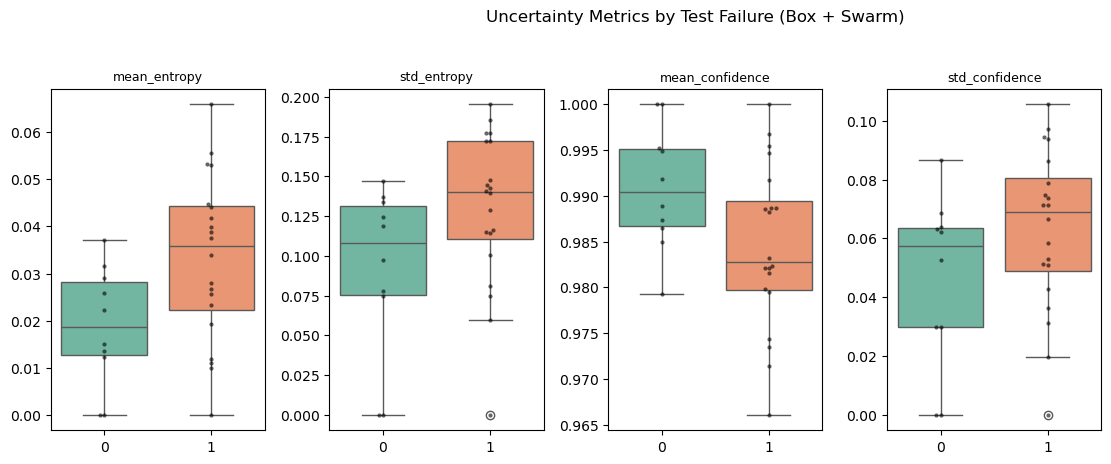

C:\Users\s\AppData\Local\Temp\ipykernel_28308\746006061.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='test_failure', y=metric, data=df_clean, palette='muted')
C:\Users\s\AppData\Local\Temp\ipykernel_28308\746006061.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='test_failure', y=metric, data=df_clean, palette='muted')
C:\Users\s\AppData\Local\Temp\ipykernel_28308\746006061.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='test_failure', y=metric, data=df_clean, palette='muted')
C:\Users\s\AppData\Local\Tem

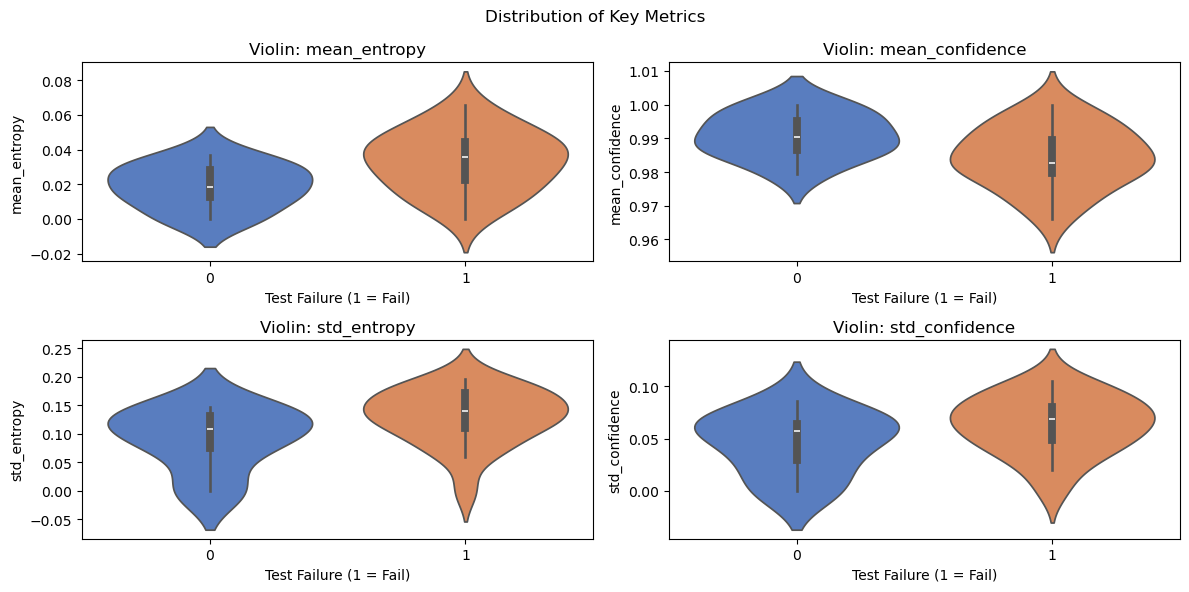

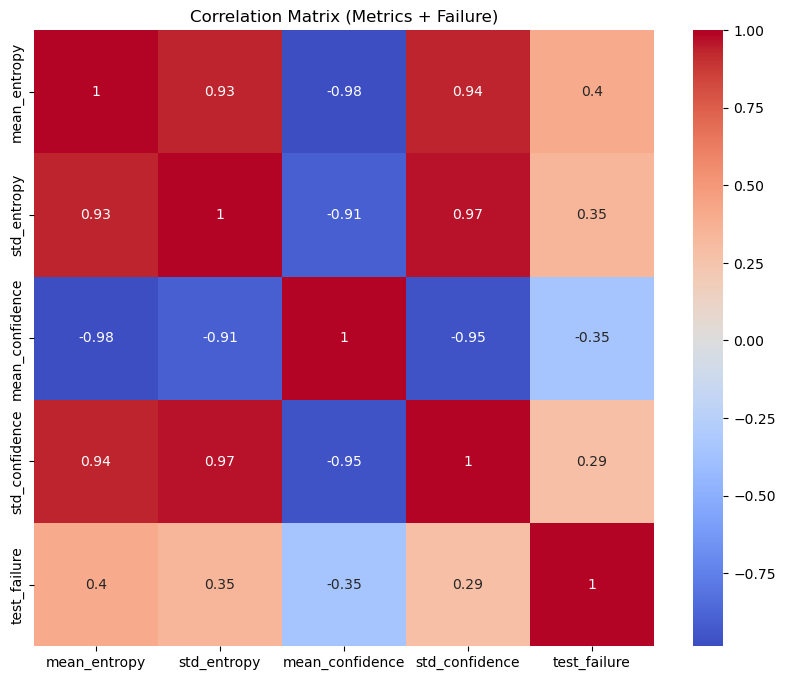

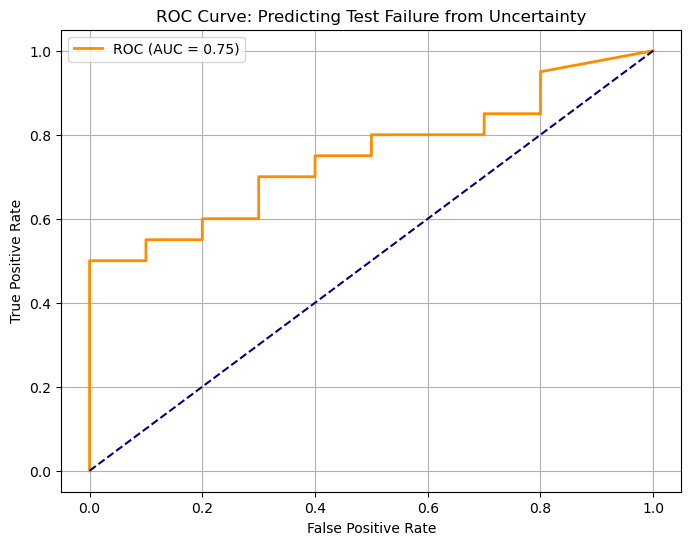

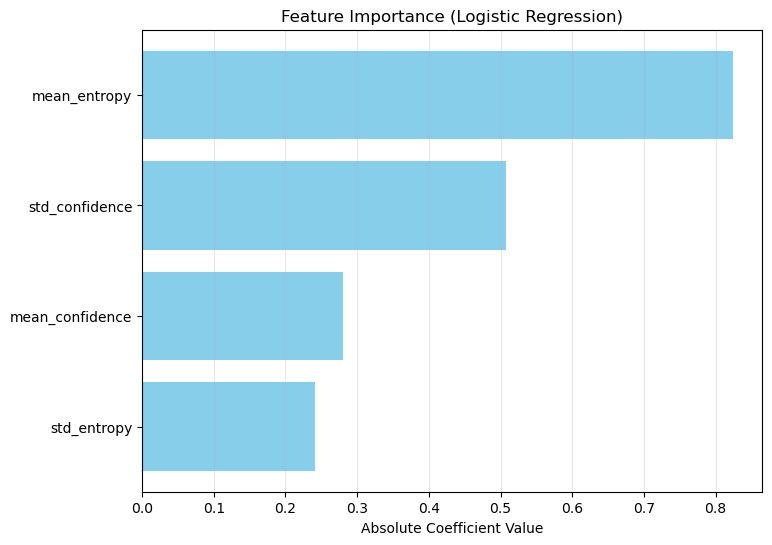

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import re
import sys
from io import StringIO
from contextlib import redirect_stdout, redirect_stderr

# ================================
# 1. Load JSONL Data
# ================================
df = pd.read_csv('C:\\Users\\s\\Desktop\\Dev\\SamsungProject\\dataChekpoints\\generation_results\\generations_up_to_30.csv')

print(f"Loaded {len(df)} samples.")
print("Columns:", df.columns.tolist())
# ================================
# 2. Clean and Extract Fields
# ================================
# Rename for consistency
df.rename(columns={
    'generated_code': 'generated_code',
    'testcase': 'testcase',
    'entry_point': 'entry_point'
}, inplace=True)

# If 'testcase' is a list of strings, join them
def ensure_test_string(testcase):
    if isinstance(testcase, list):
        return '\n'.join(testcase)
    return str(testcase).strip()

df['testcase'] = df['testcase'].apply(ensure_test_string)

# Clean generated code: remove markdown if needed
def clean_code(code):
    if pd.isna(code):
        return ""
    return re.sub(r'```python|```', '', str(code)).strip()

df['cleaned_code'] = df['generated_code'].apply(clean_code)

# ================================
# 3. Execute Tests
# ================================
def run_tests(generated_code, testcase, entry_point):
    f = StringIO()
    with redirect_stdout(f), redirect_stderr(f):
        try:
            namespace = {}
            exec("from collections import Counter\nimport math\n", namespace)  # Add common imports
            exec(generated_code, namespace)

            # Extract function by entry_point
            if entry_point not in namespace:
                return False

            # Clean up test case: remove extra quotes, handle string asserts
            test_code = testcase.replace('assert ', '').strip()
            test_code = 'assert ' + test_code.replace('\nassert', '\nassert ')

            # Run all assertions
            exec(test_code, namespace)
            return True
        except Exception:
            return False

# Apply testing
df['test_pass'] = df.apply(
    lambda row: run_tests(row['cleaned_code'], row['testcase'], row['entry_point'])
    if pd.notna(row['cleaned_code']) and pd.notna(row['testcase']) and pd.notna(row['entry_point']) else False,
    axis=1
)

df['test_failure'] = (~df['test_pass']).astype(int)  # 1 = fail, 0 = pass

print("Test results:")
print(df['test_failure'].value_counts())
# ================================
# 4. Enhanced Visualization (Safe Version)
# ================================

# Define all possible metrics you might expect
all_metrics = [
    'mean_entropy', 'std_entropy', 'mean_confidence', 'std_confidence',
    'calibrated_mean_entropy', 'calibrated_mean_confidence',
    'token_disagreement_mean', 'semantic_uncertainty_mean',
    'prob_concentration_mean', 'entropy_coefficient_variation'
]

# Keep only the ones that actually exist in your data
available_metrics = [m for m in all_metrics if m in df_clean.columns]

if len(available_metrics) == 0:
    print("❌ No uncertainty metrics found in the data.")
else:
    print(f"✅ Found {len(available_metrics)} metrics: {available_metrics}")

    # --------------------------------
    # Plot 1: Boxplot + Swarm
    # --------------------------------
    plt.figure(figsize=(14, 8))
    for i, metric in enumerate(available_metrics):
        plt.subplot(2, 5, i + 1)
        sns.boxplot(x='test_failure', y=metric, data=df_clean, palette='Set2')
        sns.swarmplot(x='test_failure', y=metric, data=df_clean, size=3, alpha=0.6, color='black')
        plt.title(metric, fontsize=9)
        plt.xlabel('')
        plt.ylabel('')
    plt.suptitle('Uncertainty Metrics by Test Failure (Box + Swarm)', y=1.02)
    plt.tight_layout()
    plt.show()

    # --------------------------------
    # Plot 2: Violin Plots for Key Metrics (only if they exist)
    # --------------------------------
    key_metrics = ['mean_entropy', 'mean_confidence', 'std_entropy', 'std_confidence']
    existing_key_metrics = [m for m in key_metrics if m in available_metrics]

    if len(existing_key_metrics) > 0:
        plt.figure(figsize=(12, 6))
        for i, metric in enumerate(existing_key_metrics):
            plt.subplot(2, 2, i + 1)
            sns.violinplot(x='test_failure', y=metric, data=df_clean, palette='muted')
            plt.title(f'Violin: {metric}')
            plt.xlabel('Test Failure (1 = Fail)')
        plt.suptitle('Distribution of Key Metrics')
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No key metrics available for violin plot.")

    # --------------------------------
    # Plot 3: Correlation Heatmap
    # --------------------------------
    numeric_cols = available_metrics + ['test_failure']
    if len(numeric_cols) > 1:
        corr = df_clean[numeric_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix (Metrics + Failure)')
        plt.show()
    else:
        print("⚠️ Not enough numeric columns for correlation heatmap.")

    # --------------------------------
    # Plot 4: ROC Curve (only if we have at least one metric)
    # --------------------------------
    if len(available_metrics) >= 1:
        X = df_clean[available_metrics]
        y = df_clean['test_failure']

        from sklearn.preprocessing import StandardScaler
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import roc_curve, auc

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        clf = LogisticRegression(random_state=42)
        clf.fit(X_scaled, y)
        y_prob = clf.predict_proba(X_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
        plt.plot([0, 1], [0, 1], '--', color='navy')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve: Predicting Test Failure from Uncertainty')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Feature Importance
        importance = pd.DataFrame({
            'metric': available_metrics,
            'importance': np.abs(clf.coef_[0])
        }).sort_values('importance', ascending=True)

        plt.figure(figsize=(8, 6))
        plt.barh(importance['metric'], importance['importance'], color='skyblue')
        plt.title('Feature Importance (Logistic Regression)')
        plt.xlabel('Absolute Coefficient Value')
        plt.grid(axis='x', alpha=0.3)
        plt.show()
    else:
        print("⚠️ Not enough features to train logistic regression model.")